In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
from scipy.optimize import curve_fit
import straxbra
from pymongo import MongoClient
import os
import strax
import json
import patrick_stylez as ps

Using TensorFlow backend.


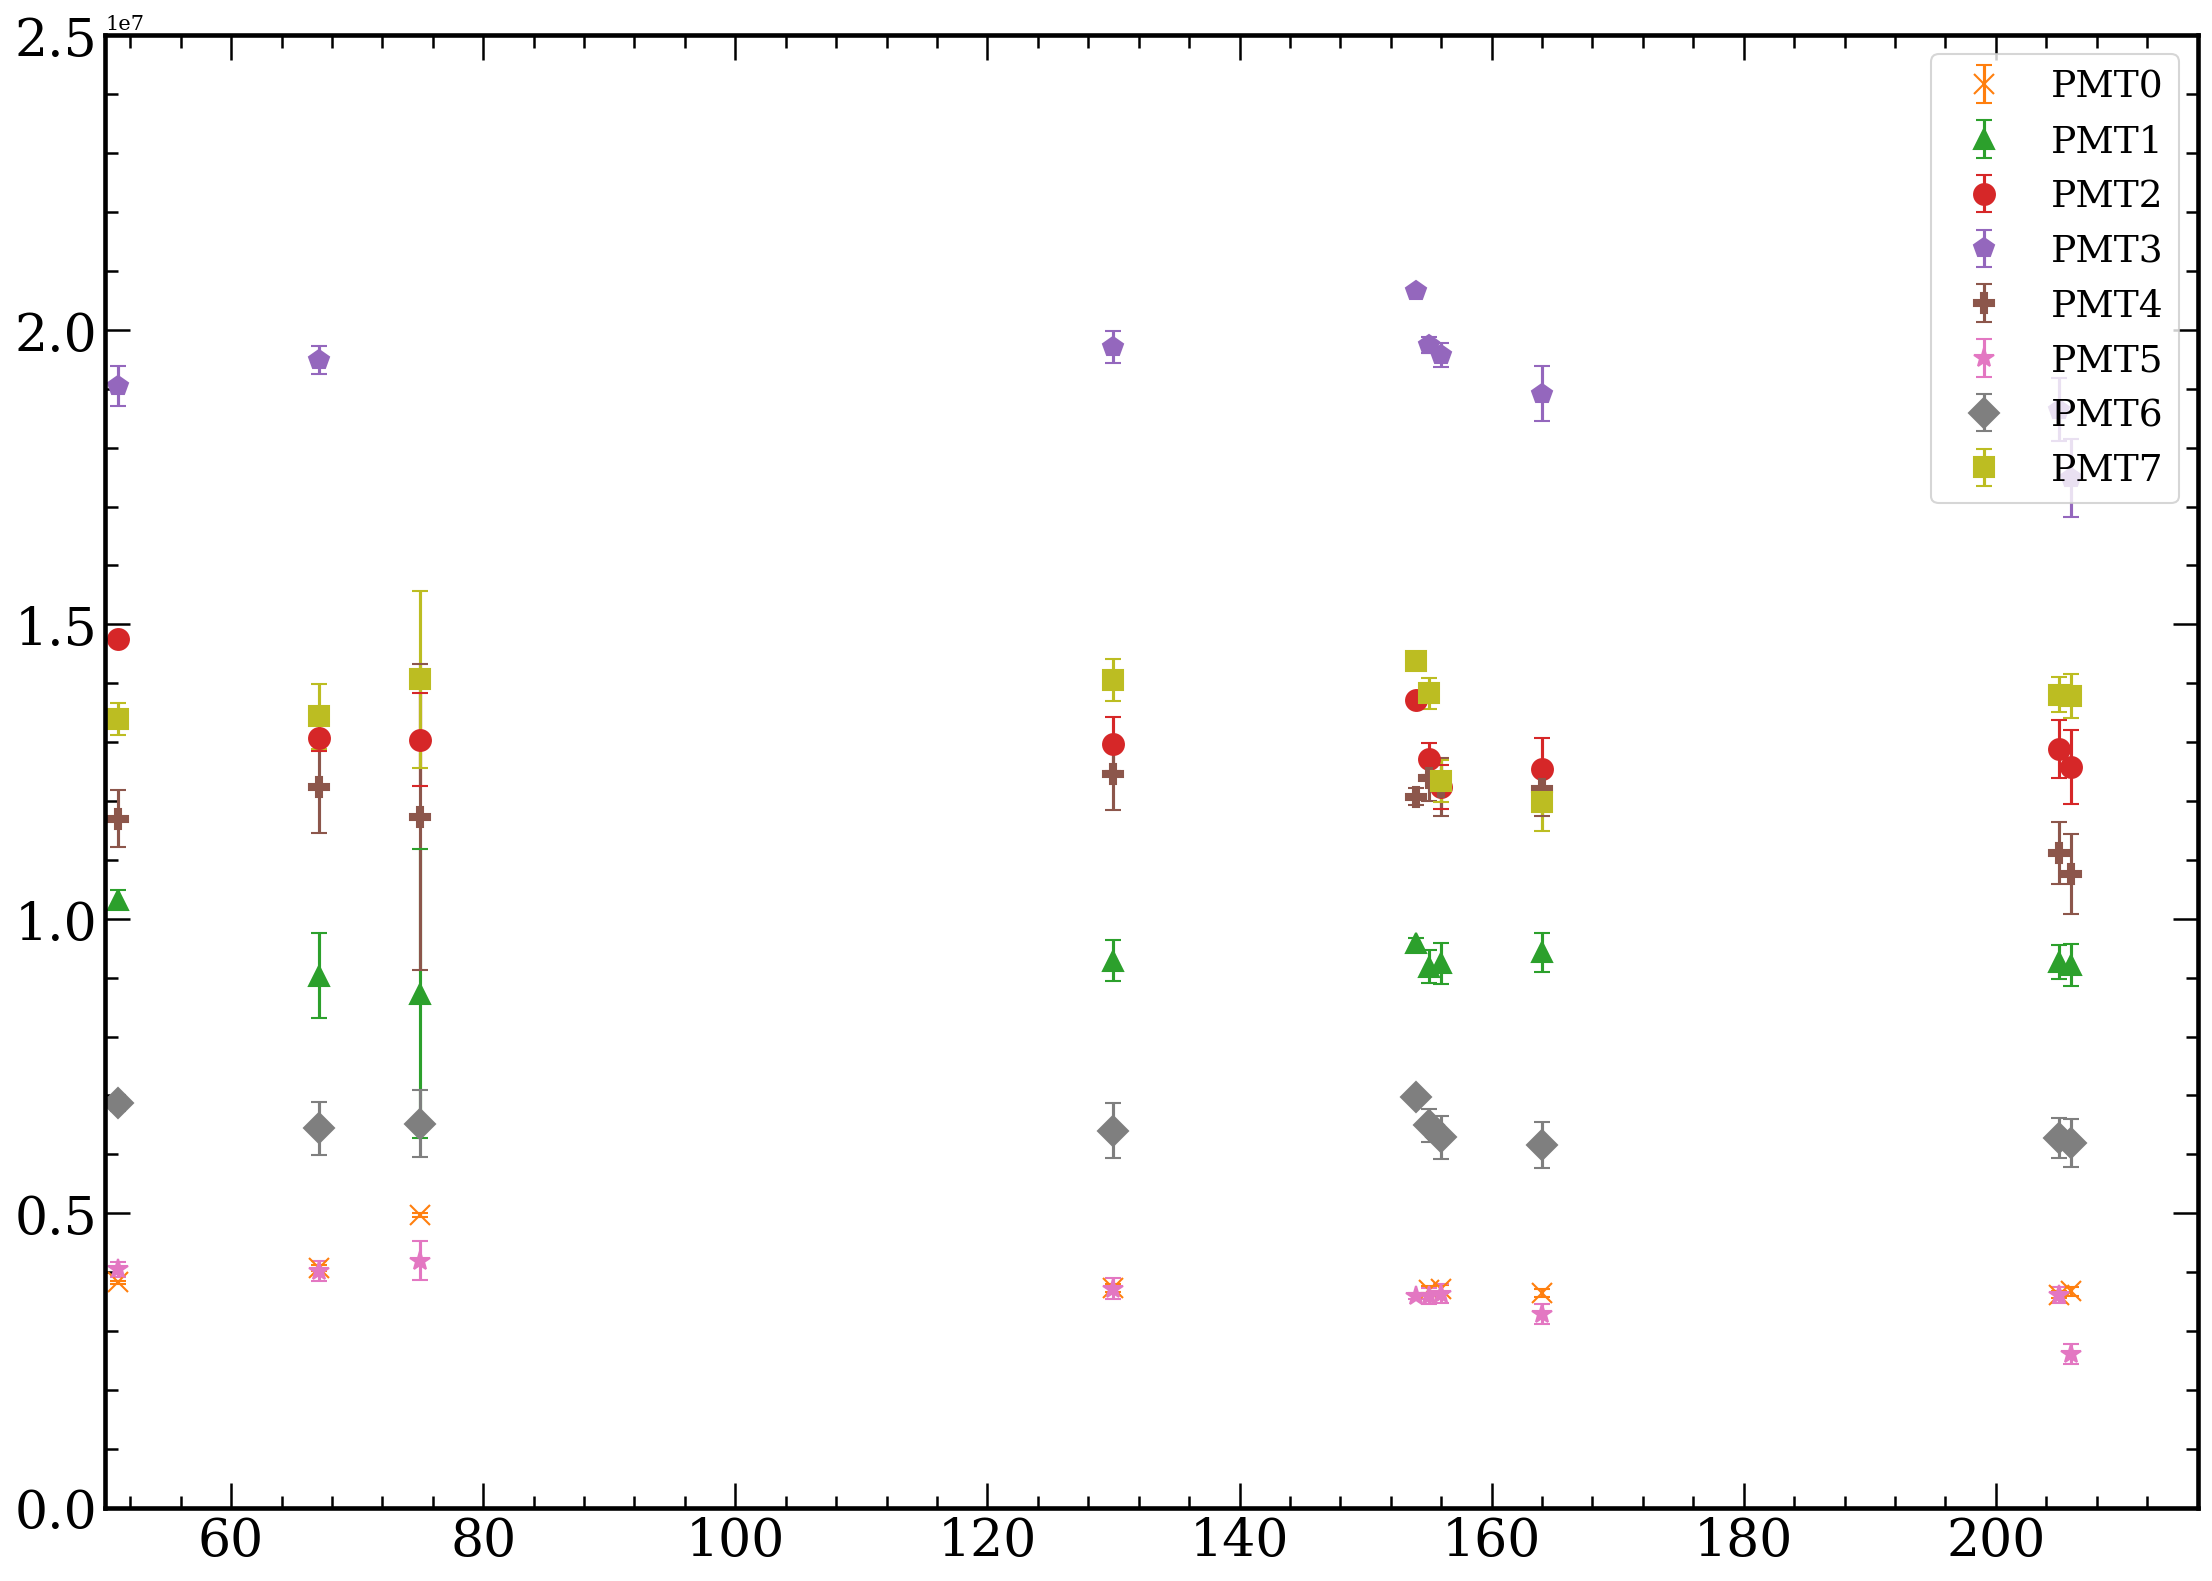

In [2]:
fig,axes = ps.styles()

PMTs = ['PMT0','PMT1', 'PMT2','PMT3','PMT4','PMT5','PMT6','PMT7']

run_list_all =  [51,67,75,130,154, 155,156, 164,205,206]
run_list_PMT3 = [51,67,   130,154, 155,156, 164,205,206]
run_list_bot =  [51,67,75,130,155,     156, 164,205,206]

PMT0_gain = [3828247.627666855,4070574.0483193803, 4967425.7593598245, 3727951.405136313,3702337.081698286, 3714556.586263022, 3646057.8803869724,3618812.2561175325,
            3672490.8264712556]
PMT0_error = [21437.98160230906,45886.43501407646, 34513.813088250856, 70111.46163840759,54065.84923842533, 67035.20896318334, 69283.66070640748,59985.98559428926,
             78256.89573062099]

PMT1_gain = [10327373.960111555,9034519.718978068, 8727717.616637733, 9290614.690071583,9586479.065620771,9188073.975211607,9241261.419246748,9429121.522610854,
            9267844.193288041, 9219372.83842708]
PMT1_error= [157495.0243350572,716097.5210447613, 2451791.3345953175, 353994.25183181744,92870.99250005761,280111.99006176624,350192.6075968949, 329746.66983524887,
             292418.62379267614,358508.1234409002]

PMT2_gain = [14743142.150674934,13066457.669562742, 13038257.19386931, 12968215.150645332,13714306.76709562,12714833.423075373, 12240373.057817218, 12536324.917247061,
             12886211.092622703,12574324.046343755]
PMT2_error= [55482.18985193655,223620.25545523615, 791210.2609412754,452560.78464562015,90626.54809676949,276540.0290790948, 377296.239518047, 533223.9178775865,
             491659.34588287055,633116.7942439578]

PMT3_gain = [19044861.311703734,19490140.203332476, 19703017.752790254,20667947.904172018,19742629.07528022,19568329.547846347, 18915773.533666116,
             18645900.668671757,17486449.071162168]
PMT3_error= [341861.8594848329,236152.4171120537, 270501.1552136297,67149.63427302856,130315.21341170035,205388.57118115155, 466017.4485542318,
             540654.364717323,668859.8974249227]
PMT4_gain = [11697502.803489128,12242568.186243186, 11728766.934668269, 12455786.660716176,12075059.886974245,12397652.218254812,12241181.05073582, 12201084.145320193,
             11120030.854528064,10763659.460857524]
PMT4_error= [485134.6930491938,788551.2194622745, 2600606.59220548, 613135.457995917,139186.9956317982,405208.88201452997,490564.0721555241, 452361.3928817471,
             526718.8925110949,680518.4290750729]

PMT5_gain = [4049957.2159908535,4016570.9635887956, 4196796.601180555, 3722146.962499531,3594521.142793898,3592687.743558446,3636263.104023477, 3293400.5399161514,
             3606013.9538725424,2605535.836378833]
PMT5_error= [129705.97380503544,165558.5261731221, 337588.21986895724, 174766.78224183925,46666.085803097935,136412.57278831264, 163479.20815795755, 167659.34405571637,
             136117.45375049545,168130.0027552129]

PMT6_gain = [6869164.827701857,6442821.536130012, 6521138.268731327, 6404871.760674138,6974419.922894093,6496382.9477601275,6286866.337162314, 6154807.724201814,
             6280585.061794631,6187580.90350615]
PMT6_error= [132682.7128102474,451613.7067028092, 571432.9122407087,474725.419112573, 81395.83030198957,278540.8420466017,370912.07684512176, 391580.65338534135,
             335555.83611198235,408489.9375973025]

PMT7_gain = [13390907.334109392,13438954.14243522, 14064303.644212527, 14054202.316304144, 14385845.681992096,13825996.654146177, 12342486.65726032, 11981892.737402707,
             13808310.46059004,13784311.795617213]
PMT7_error= [266578.8795810015,552503.6609706564, 1496512.9232662742, 361348.7312246148,84316.61804328478,255480.2076326886,352765.18583276747, 484144.9253909933,
             292332.39738549816,374078.5815242212]

axes.errorbar(run_list_bot, PMT0_gain, yerr=PMT0_error, marker = 'x', fmt='.',c = 'C1',markersize='10', ecolor='C1',capsize=4, label = PMTs[0])
axes.errorbar(run_list_all, PMT1_gain, yerr=PMT1_error, marker = '^', fmt='.',c = 'C2',markersize='10', ecolor='C2',capsize=4, label = PMTs[1])
axes.errorbar(run_list_all, PMT2_gain, yerr=PMT2_error, marker = 'o', fmt='.',c = 'C3',markersize='10', ecolor='C3',capsize=4,label = PMTs[2])
axes.errorbar(run_list_PMT3, PMT3_gain, yerr=PMT3_error, marker = 'p', fmt='.',c = 'C4',markersize='10', ecolor='C4',capsize=4,label = PMTs[3])
axes.errorbar(run_list_all, PMT4_gain, yerr=PMT4_error, marker = 'P', fmt='.',c = 'C5',markersize='10', ecolor='C5',capsize=4,label = PMTs[4])
axes.errorbar(run_list_all, PMT5_gain, yerr=PMT5_error, marker = '*', fmt='.',c = 'C6',markersize='10', ecolor='C6',capsize=4,label = PMTs[5])
axes.errorbar(run_list_all, PMT6_gain, yerr=PMT6_error, marker = 'D', fmt='.',c = 'C7',markersize='10', ecolor='C7',capsize=4,label = PMTs[6])
axes.errorbar(run_list_all, PMT7_gain, yerr=PMT7_error, marker = 's', fmt='.',c = 'C8',markersize='10', ecolor='C8',capsize=4,label = PMTs[7])
axes.legend(loc = 1,prop={'size': 18})



axes.set_ylim([0,2.5e7])
axes.set_xlim([run_list_all[0]-1,run_list_all[-1]+10])
plt.show()

# Gain for all PMTs

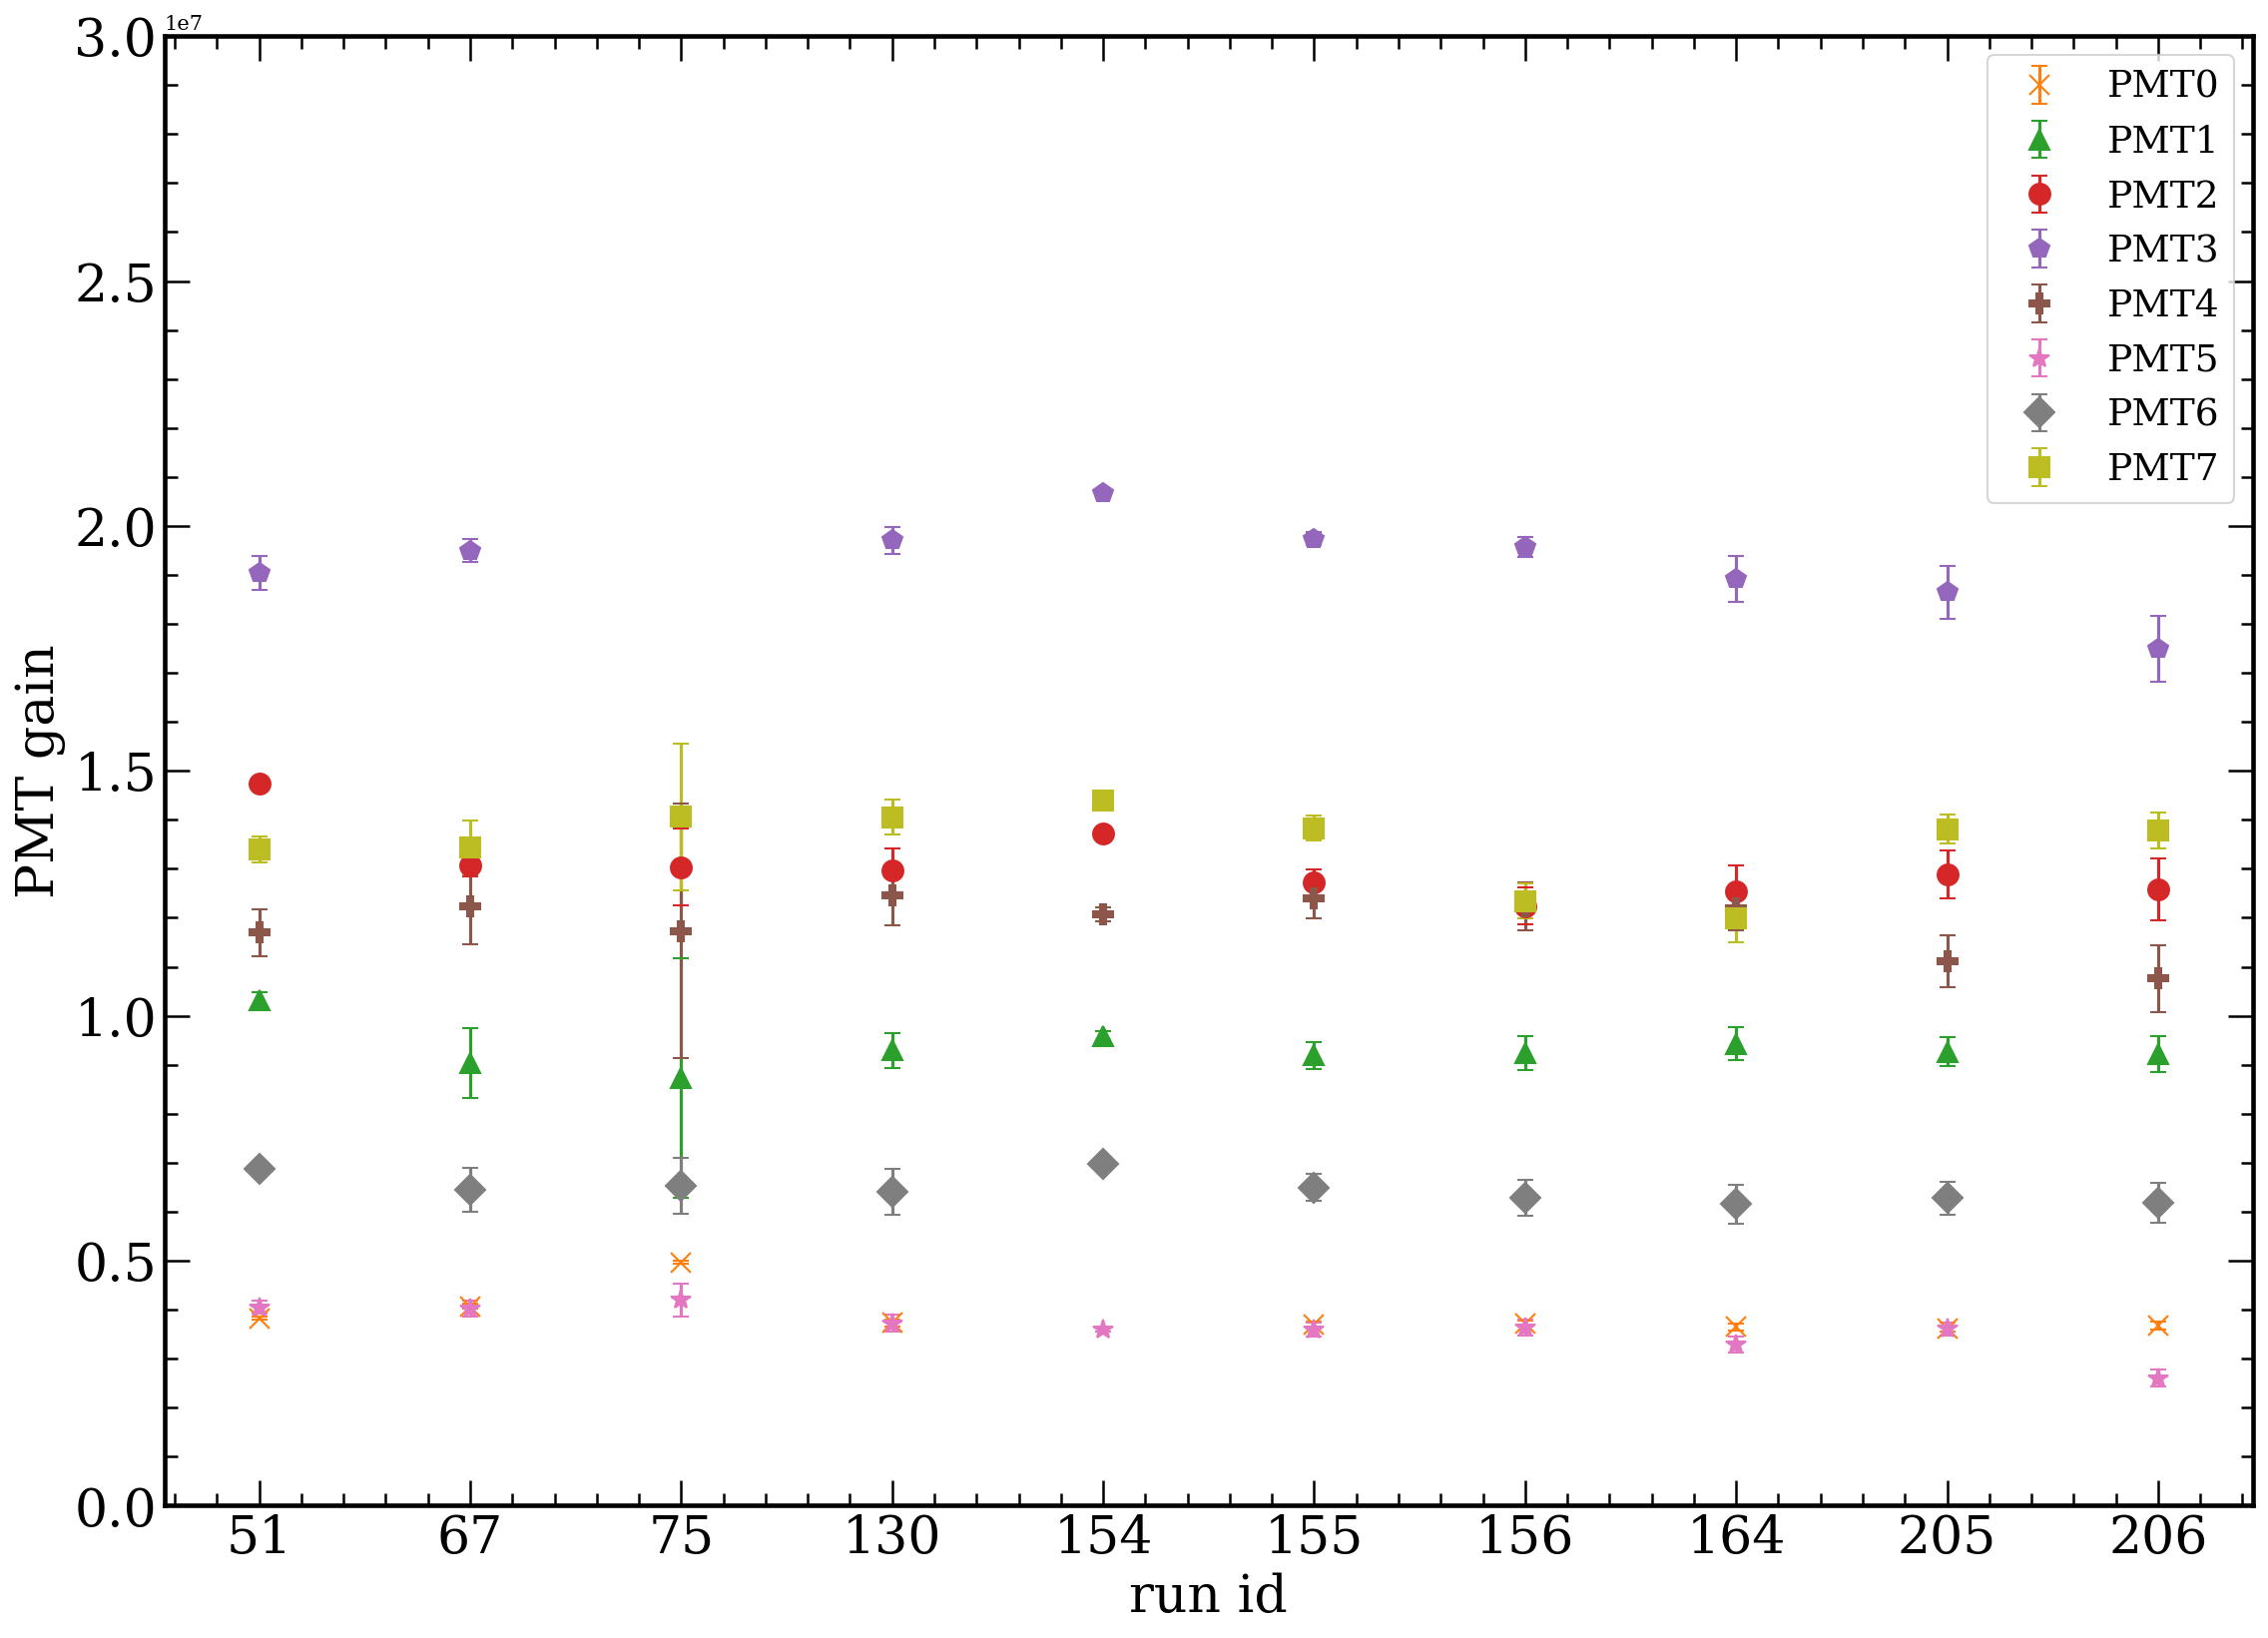

In [3]:
fig,axes = ps.styles()

positions = (1, 2, 3,4,5,6,7,8,9,10)
positions_PMT3 = (1,2,4,5,6,7,8,9,10)
positions_bot = (1,2,3,4,6,7,8,9,10)
labels =      ("51","67","75","130","154", "155","156", "164","205","206")
labels_PMT3 = ("51","67",     "130","154", "155","156", "164","205","206")
labels_bot =  ("51","67","75","130",       "155","156", "164","205","206")
plt.xticks(positions, labels)
axes.errorbar(positions_bot, PMT0_gain, yerr=PMT0_error, marker = 'x', fmt='.',c = 'C1',markersize='10', ecolor='C1',capsize=4, label = PMTs[0])
axes.errorbar(positions, PMT1_gain, yerr=PMT1_error, marker = '^', fmt='.',c = 'C2',markersize='10', ecolor='C2',capsize=4, label = PMTs[1])
axes.errorbar(positions, PMT2_gain, yerr=PMT2_error, marker = 'o', fmt='.',c = 'C3',markersize='10', ecolor='C3',capsize=4,label = PMTs[2])
axes.errorbar(positions_PMT3, PMT3_gain, yerr=PMT3_error, marker = 'p', fmt='.',c = 'C4',markersize='10', ecolor='C4',capsize=4,label = PMTs[3])
axes.errorbar(positions, PMT4_gain, yerr=PMT4_error, marker = 'P', fmt='.',c = 'C5',markersize='10', ecolor='C5',capsize=4,label = PMTs[4])
axes.errorbar(positions, PMT5_gain, yerr=PMT5_error, marker = '*', fmt='.',c = 'C6',markersize='10', ecolor='C6',capsize=4,label = PMTs[5])
axes.errorbar(positions, PMT6_gain, yerr=PMT6_error, marker = 'D', fmt='.',c = 'C7',markersize='10', ecolor='C7',capsize=4,label = PMTs[6])
axes.errorbar(positions, PMT7_gain, yerr=PMT7_error, marker = 's', fmt='.',c = 'C8',markersize='10', ecolor='C8',capsize=4,label = PMTs[7])
axes.legend(loc = 1,prop={'size': 18})
axes.set_ylim([0,3e7])
axes.set_xlabel('run id')
axes.set_ylabel('PMT gain')

plt.show()

# Gain for bottom PMT and PMT5

average gain : 3883161.50 +/- 55619.70


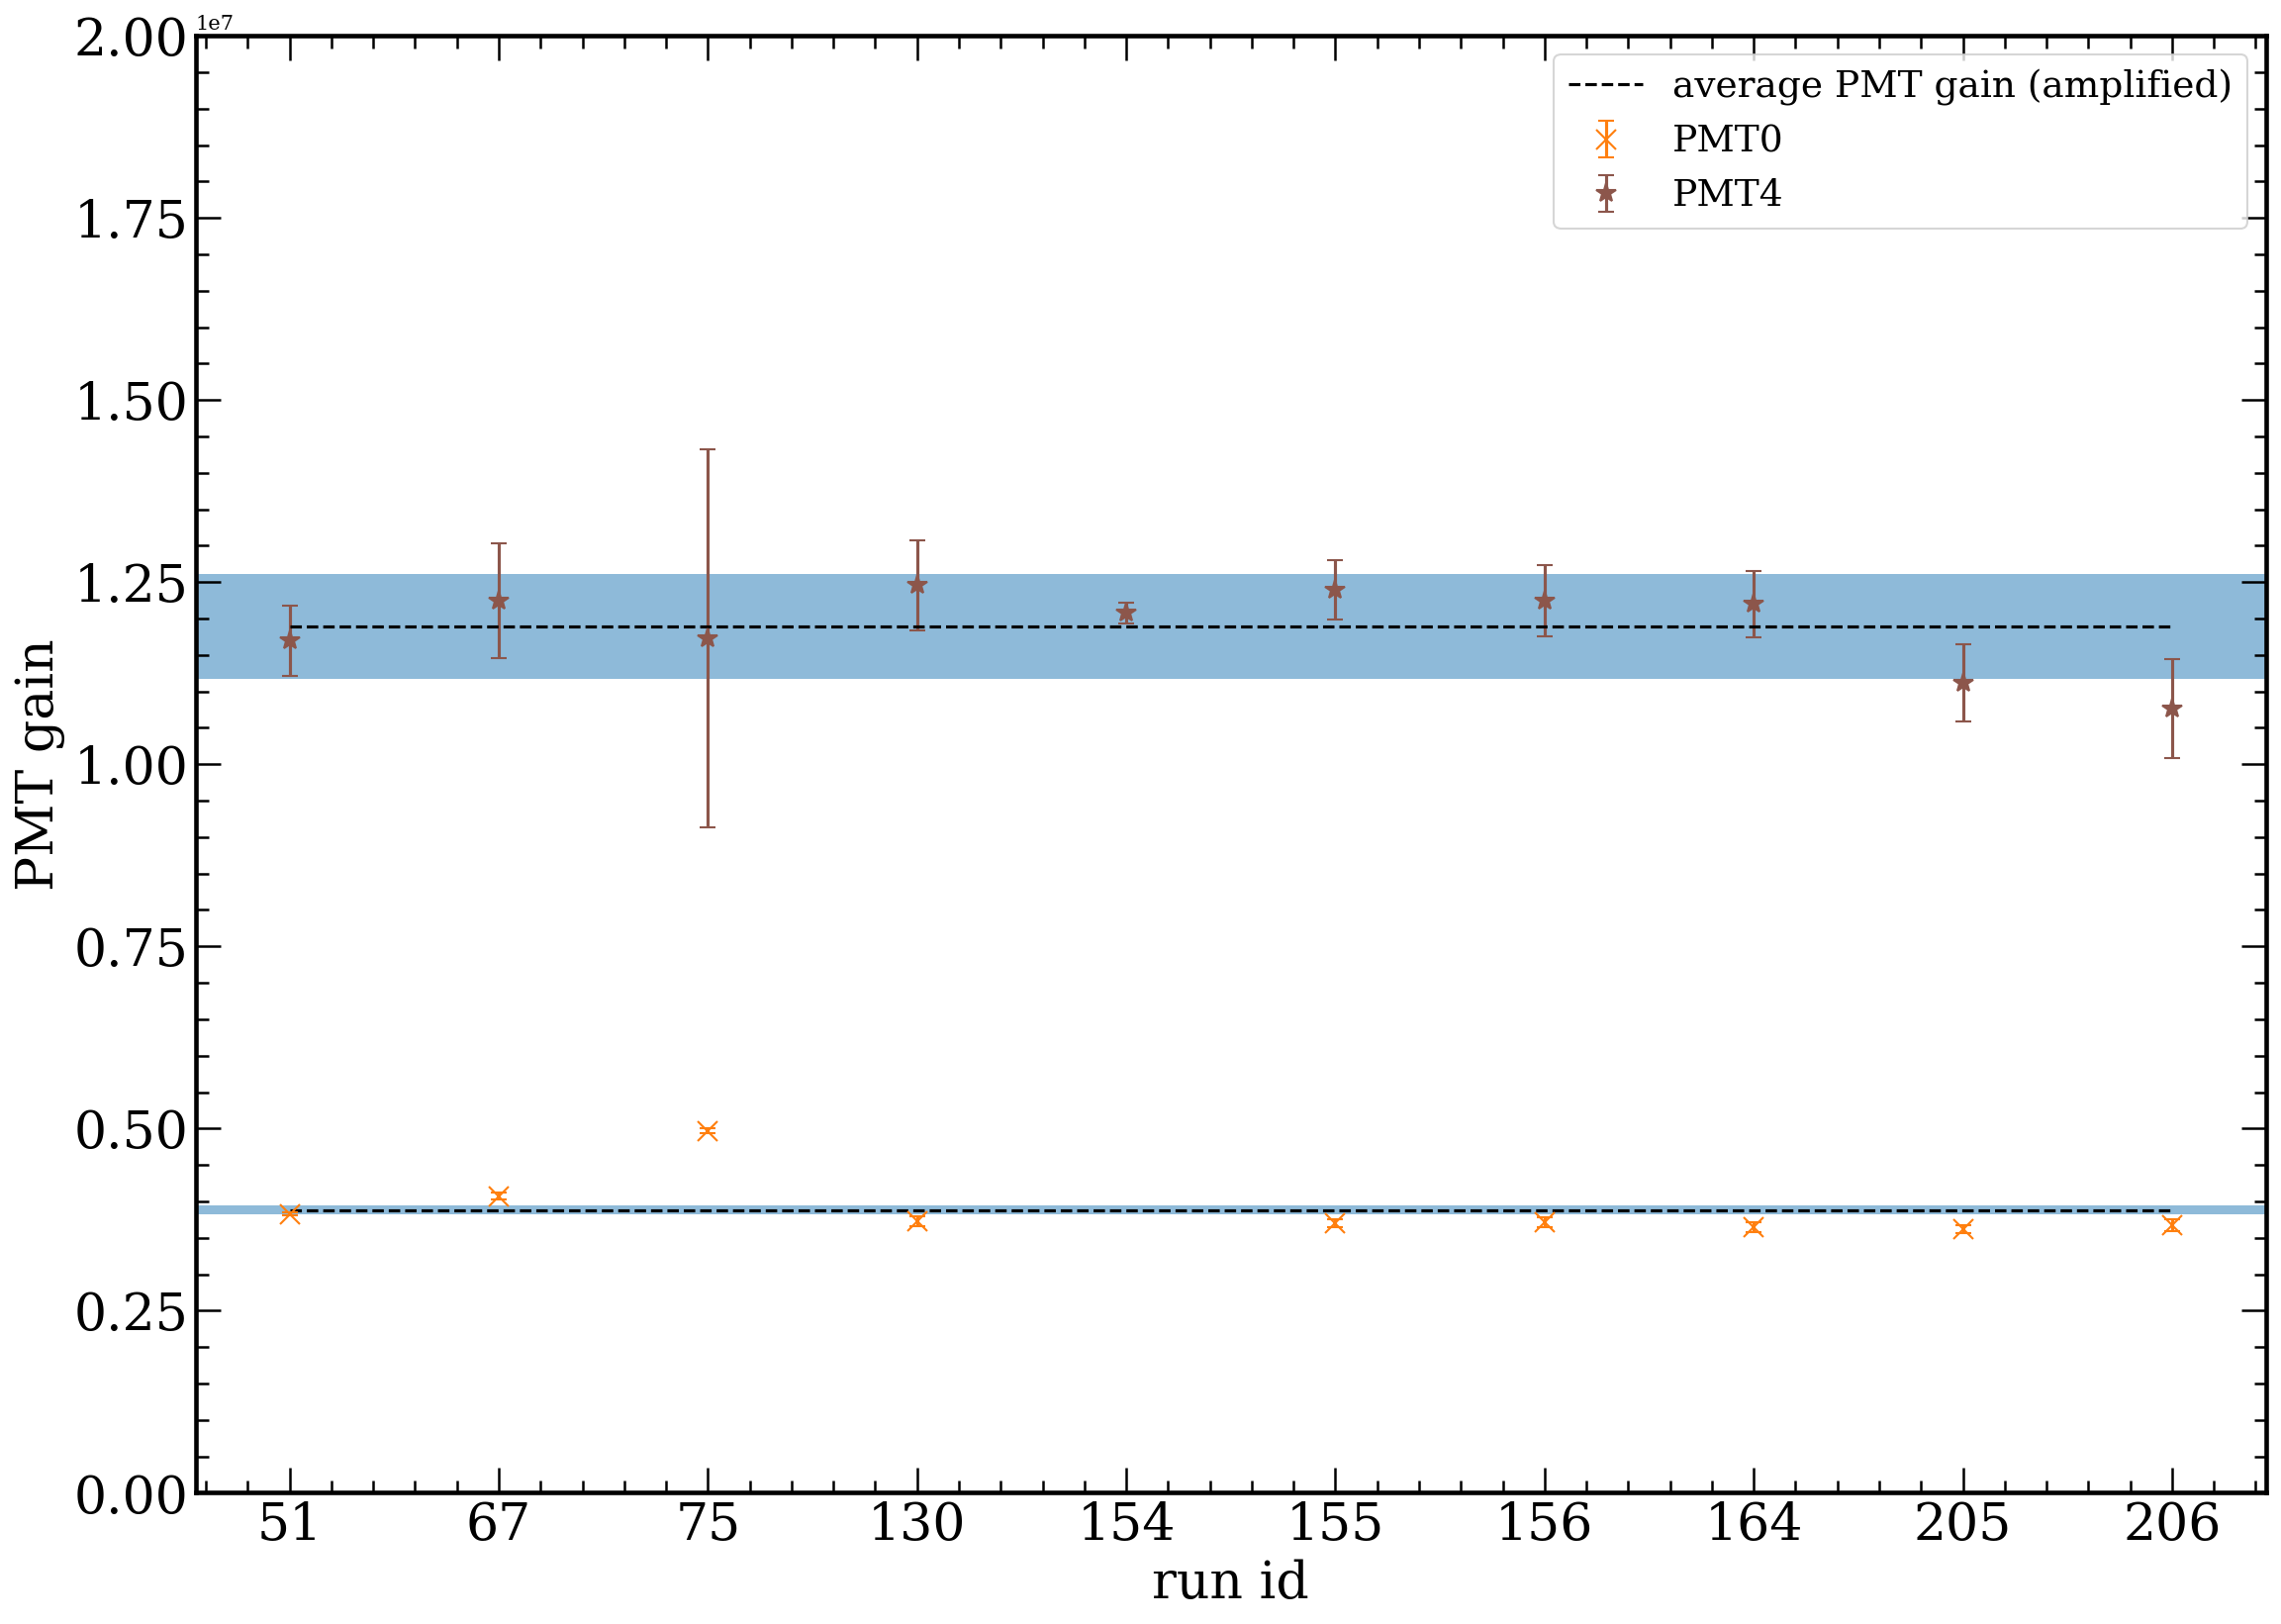

In [16]:
fig,axes = ps.styles()
adc_to_e = (2.25/2**14) * (1e-8) * (1/50) * (1/1.602e-19) * (1/10)

average_gain_PMT0 = (np.array(PMT0_gain).sum())/len(PMT0_gain)
average_error_PMT0 = (np.array(PMT0_error).sum())/len(PMT0_error)
average_gain_PMT1 = (np.array(PMT1_gain).sum())/len(PMT1_gain)
average_error_PMT1 = (np.array(PMT1_error).sum())/len(PMT1_error)
average_gain_PMT2 = (np.array(PMT2_gain).sum())/len(PMT2_gain)
average_error_PMT2 = (np.array(PMT2_error).sum())/len(PMT2_error)
average_gain_PMT3 = (np.array(PMT3_gain).sum())/len(PMT3_gain)
average_error_PMT3 = (np.array(PMT3_error).sum())/len(PMT3_error)
average_gain_PMT4 = (np.array(PMT4_gain).sum())/len(PMT4_gain)
average_error_PMT4 = (np.array(PMT4_error).sum())/len(PMT4_error)
average_gain_PMT5 = (np.array(PMT5_gain).sum())/len(PMT5_gain)
average_error_PMT5 = (np.array(PMT5_error).sum())/len(PMT5_error)
average_gain_PMT6 = (np.array(PMT6_gain).sum())/len(PMT6_gain)
average_error_PMT6 = (np.array(PMT6_error).sum())/len(PMT6_error)
average_gain_PMT7 = (np.array(PMT7_gain).sum())/len(PMT7_gain)
average_error_PMT7 = (np.array(PMT7_error).sum())/len(PMT7_error)


positions = (1, 2, 3,4,5,6,7,8,9,10)
positions_bot = (1,2,3,4,6,7,8,9,10)
labels =      ("51","67","75","130","154", "155","156", "164","205","206")
labels_bot =  ("51","67","75","130",       "155","156", "164","205","206")
plt.xticks(positions, labels)
axes.hlines(average_gain_PMT0, xmin = positions[0], xmax = positions[-1], colors='k', linestyles='--')
axes.axhspan(ymin = average_gain_PMT0-average_error_PMT0, ymax = average_gain_PMT0+average_error_PMT0, alpha = 0.5)
axes.errorbar(positions_bot, PMT0_gain, yerr=PMT0_error, marker = 'x', fmt='.',c = 'C1',markersize='10', ecolor='C1',capsize=4, label = PMTs[0])
axes.errorbar(positions, PMT4_gain, yerr=PMT4_error, marker = '*', fmt='.',c = 'C5',markersize='10', ecolor='C5',capsize=4,label = PMTs[4])
axes.hlines(average_gain_PMT4, xmin = positions[0], xmax = positions[-1], colors='k', linestyles='--', label = 'average PMT gain (amplified)')
axes.axhspan(ymin = average_gain_PMT4-average_error_PMT4, ymax = average_gain_PMT4+average_error_PMT4, alpha = 0.5)
axes.legend(loc = 1,prop={'size': 18})
axes.set_ylim([0,2e7])
axes.set_xlabel('run id')
axes.set_ylabel('PMT gain')
print('average gain :', f"{average_gain_PMT0:.2f}", '+/-', f"{average_error_PMT0:.2f}")
# print('average gain :', f"{average_gain_PMT7:.2f}")
plt.show()